In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!unzip bank.zip

--2022-07-24 09:33:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K  1.71MB/s    in 0.3s    

2022-07-24 09:33:02 (1.71 MB/s) - ‘bank.zip’ saved [579043/579043]

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [ ]:
df = pd.read_csv('bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.shape

(4521, 17)

Check the unique values of attributes

In [ ]:
print(df['campaign'].unique())
print(df['job'].unique())

[ 1  4  2  5  3  6 18 10  9  7 12 14 13 24 11  8 29 32 16 22 15 30 25 21
 17 19 23 20 50 28 31 44]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


Check the missing or null values

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
final_dataset = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]
final_dataset.drop(['month'],axis=1,inplace=True)
final_dataset.drop(['day'],axis=1,inplace=True)      
final_dataset.head()     

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


Show the correlation between attributes

Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lable_encoder = LabelEncoder()
final_dataset.iloc[:, 1] = lable_encoder.fit_transform(final_dataset.iloc[:, 1])
final_dataset.iloc[:, 2] = lable_encoder.fit_transform(final_dataset.iloc[:, 2])
final_dataset.iloc[:, 3] = lable_encoder.fit_transform(final_dataset.iloc[:, 3])
final_dataset.iloc[:, 4] = lable_encoder.fit_transform(final_dataset.iloc[:, 4])
final_dataset.iloc[:, 6] = lable_encoder.fit_transform(final_dataset.iloc[:, 6])
final_dataset.iloc[:, 7] = lable_encoder.fit_transform(final_dataset.iloc[:, 7])
final_dataset.iloc[:, 8] = lable_encoder.fit_transform(final_dataset.iloc[:, 8])
final_dataset.iloc[:, 13] = lable_encoder.fit_transform(final_dataset.iloc[:, 13])
final_dataset.iloc[:, 14] = lable_encoder.fit_transform(final_dataset.iloc[:, 14])
final_dataset.head()
print(final_dataset['job'].unique())
print(final_dataset['education'].unique())

[10  7  4  1  6  9  2  0  8  3  5 11]
[0 1 2 3]


In [ ]:
# from joblib import dump, load
# dump(final_dataset, 'encoder.joblib') 
import pickle
filename = 'encoder.pkl'
pickle.dump(lable_encoder, open(filename, 'wb'))

In [ ]:
final_dataset.corr()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
duration,-0.002367,-0.006739,0.006619,-0.014878,-0.011615,-0.015950,0.015740,-0.004997,-0.011380,1.000000,-0.068382,0.010380,0.018080,0.000478,0.401118


In [ ]:
final_dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

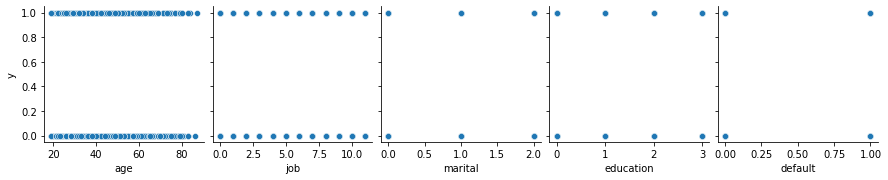

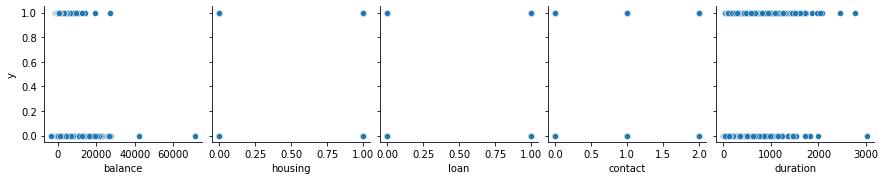

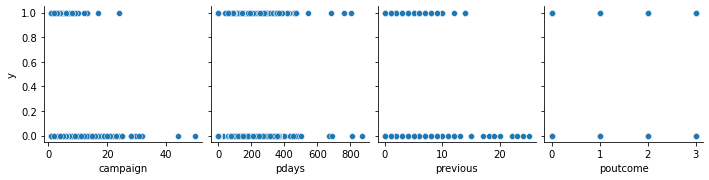

In [ ]:

sns.pairplot(data = final_dataset,
             y_vars=['y'],
             x_vars=['age', 'job', 'marital', 'education', 'default'])
sns.pairplot(data = final_dataset,
             y_vars=['y'],
             x_vars=[ 'balance', 'housing','loan', 'contact', 'duration'])

sns.pairplot(data = final_dataset,
             y_vars=['y'],
             x_vars=[ 'campaign', 'pdays', 'previous','poutcome'])

In [ ]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.clf()
plt.figure(figsize = (25,25))

<Figure size 1800x1800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

Plot Heat map

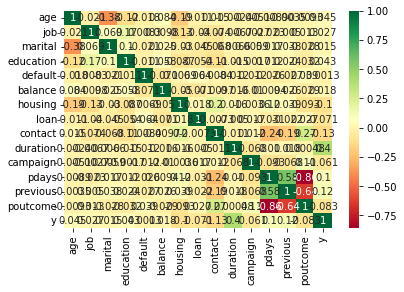

In [ ]:

g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Define x and y

In [ ]:
x = final_dataset.iloc[:,:14]
y = final_dataset.iloc[:,14]



In [ ]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,226,1,-1,0,3


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

**Train the model with all attributes**

Seperate testing dataset and training dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_all_train,x_all_test,y_all_train,y_all_test = train_test_split(x,y,test_size=0.2)
x_all_train.shape

(3616, 14)

Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  
model.fit(x_all_train,y_all_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model.predict(x_all_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Calculate the accurracy of the testing data

In [ ]:
model.score(x_all_test,y_all_test)

0.8751381215469614

**Feature Importance**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy')
model.fit(x,y)
print(model.feature_importances_)

[0.12473816 0.08823331 0.0377907  0.04191284 0.00634922 0.13584067
 0.02619329 0.01395758 0.03730482 0.29517841 0.07663738 0.03949469
 0.02605628 0.05031266]


In [ ]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [ ]:
features = pd.DataFrame({'Features' : x.columns,
                                'Importance' : model.feature_importances_,})
features.sort_values(by='Importance',inplace=True,ascending=False)
features

,Features,Importance
9,duration,0.295178
5,balance,0.135841
0,age,0.124738
1,job,0.088233
10,campaign,0.076637
13,poutcome,0.050313
3,education,0.041913
11,pdays,0.039495
2,marital,0.037791
8,contact,0.037305


Plot graph of top 5 feature importances for better visualization

In [ ]:
f_importances = pd.Series(model.feature_importances_, index=x.columns)
f_importances.nlargest(5).plot(kind='barh')
plt.show

Filter datas from top 5 attributes from calculated feature importances

In [ ]:
top5 = final_dataset[['duration','age','balance','job','campaign','y']]
top5_x = top5.iloc[:,:5]
top5_y = top5.iloc[:,5]
top5_x.head()
top5_y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Seperate testing dataset and training dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(top5_x,top5_y,test_size=0.2)
x_train.shape

(3616, 5)

Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Predict the test data

In [ ]:
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Calculate the accurracy of the testing data

In [ ]:
model.score(x_test,y_test)

0.8828729281767956

**Create a model using top 7 attriutes**

In [ ]:
top7 = final_dataset[['duration','age','balance','job','campaign','pdays','education','y']]
top7_x = top7.iloc[:,:7]
top7_y = top7.iloc[:,7]
top7_x.head()


,duration,age,balance,job,campaign,pdays,education
0,79,30,1787,10,1,-1,0
1,220,33,4789,7,1,339,1
2,185,35,1350,4,1,330,2
3,199,30,1476,4,4,-1,2
4,226,59,0,1,1,-1,1


In [ ]:
from sklearn.model_selection import train_test_split
x7_train,x7_test,y7_train,y7_test = train_test_split(top7_x,top7_y,test_size=0.2)
x7_train.shape

(3616, 7)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  
model.fit(x7_train,y7_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# from joblib import dump, load
# dump(model, 'model.joblib') 
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
model.predict(x7_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
model.score(x7_test,y7_test)

0.8895027624309392